<a href="https://colab.research.google.com/github/December04/MachineLearningProgramming/blob/main/Week10/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [16]:
X_train = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt")
y_train = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt")
X_test = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt")
y_test = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt")

In [17]:
y_train = to_categorical(y_train - 1)
y_test = to_categorical(y_test - 1)

print("훈련 데이터:", X_train.shape)
print("테스트 데이터:", X_test.shape)

훈련 데이터: (7352, 561)
테스트 데이터: (2947, 561)


In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(561, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

In [20]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 559, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 279, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 277, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 138, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 17664)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     2,261,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,286,854 (8.72 MB)

 Trainable params: 2,286,854 (8.72 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.5943 - loss: 0.9928 - val_accuracy: 0.9313 - val_loss: 0.1991
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.9156 - loss: 0.2249 - val_accuracy: 0.9388 - val_loss: 0.1748
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 177ms/step - accuracy: 0.9507 - loss: 0.1323 - val_accuracy: 0.9347 - val_loss: 0.1557
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.9564 - loss: 0.1118 - val_accuracy: 0.9409 - val_loss: 0.1418
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 189ms/step - accuracy: 0.9740 - loss: 0.0765 - val_accuracy: 0.9368 - val_loss: 0.1991
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - accuracy: 0.9748 - loss: 0.0720 - val_accuracy: 0.9436 - val_loss: 0.1529
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step - accuracy: 0.9785 - loss: 0.0581 - val_accuracy: 0.9354 - val_loss: 0.1886
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.9850 - loss: 0.0441 - val_accu

In [23]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ 테스트 정확도: {acc*100:.2f}%")
print(f"✅ 테스트 손실: {loss:.4f}")


✅ 테스트 정확도: 95.08%
✅ 테스트 손실: 0.2152


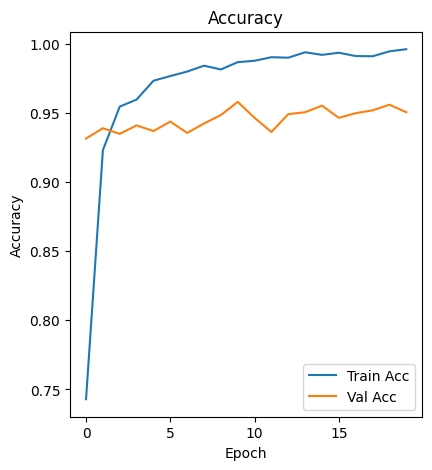

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

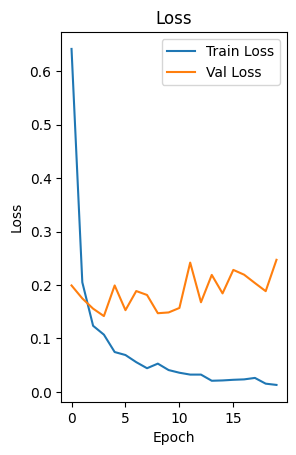

In [25]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()